In [9]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
path = '/content/drive/MyDrive/Data/Brain Tumor.csv'
df = pd.read_csv(path)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

In [13]:
df.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


In [14]:
df.sample(frac=1)

dataX = df.iloc[:,2:]

scaler = MinMaxScaler()
dxs = scaler.fit_transform(dataX)
dataX = pd.DataFrame(dxs,columns=dataX.columns)

dataX.describe()

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.283771,0.243498,0.448647,0.184732,0.063253,0.014950,0.036920,0.318566,0.167150,0.529835,0.147988,0.922356,1.113131e-168
std,0.172732,0.160783,0.168152,0.178502,0.073075,0.041263,0.032402,0.228961,0.167958,0.181349,0.068155,0.059374,0.000000e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.147875,0.123848,0.331279,0.015178,0.020950,0.002420,0.020397,0.079452,0.012201,0.367836,0.100611,0.902770,0.000000e+00
50%,0.253273,0.213052,0.444225,0.167015,0.043835,0.006154,0.030640,0.355368,0.144728,0.577039,0.140028,0.935620,0.000000e+00
75%,0.396066,0.331498,0.561986,0.285535,0.078919,0.013671,0.046714,0.485299,0.255624,0.666354,0.185758,0.957740,0.000000e+00
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.459838e-167


In [15]:
# 1 : Tumor
# 0 : Non-Tumor

dataY = df[["Class"]]

print("dataY\n",dataY.value_counts(),"\n")

dataY
 Class
0        2079
1        1683
dtype: int64 



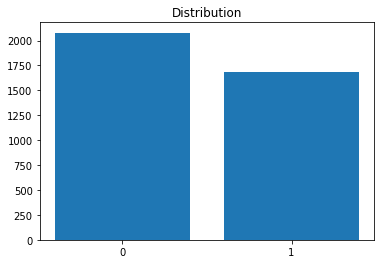

In [16]:
plt.bar(["0","1"],dataY.value_counts())
plt.title("Distribution")
plt.show()

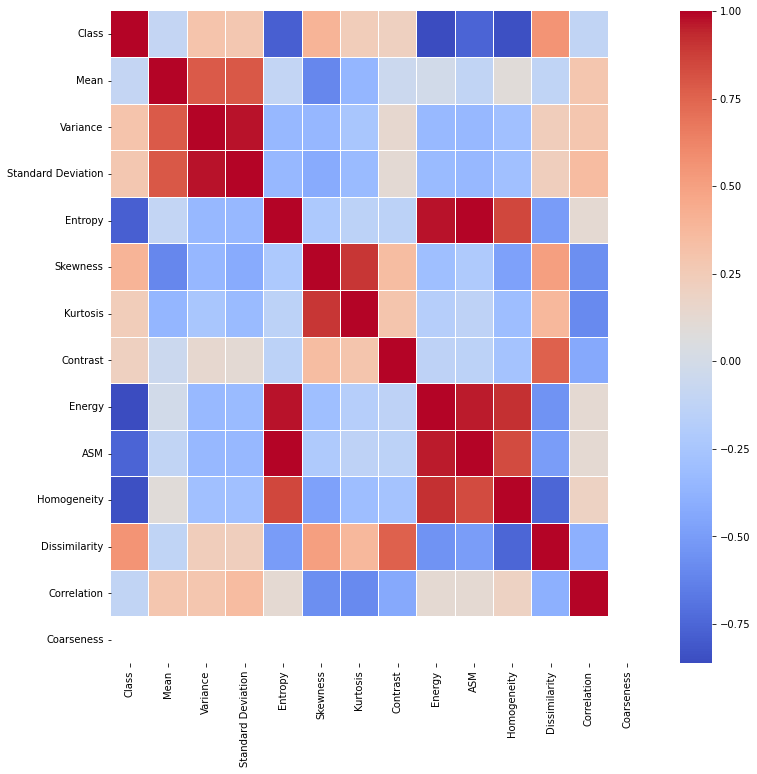

In [17]:
plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(),linewidths=.01,cmap="coolwarm")
plt.show()

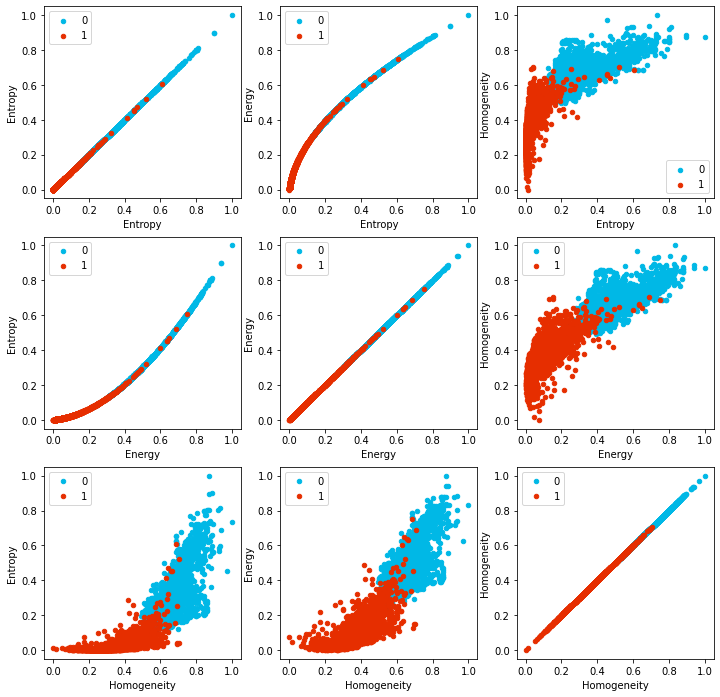

In [18]:
colors = {0:"#00b8e6", 1:"#e62e00"}
fig, axes = plt.subplots(3,3)
grouped = pd.concat([dataX,dataY],axis=1).groupby("Class")

colms = ["Entropy", "Energy", "Homogeneity"]

for i in range(3):
    for j in range(3):
        for key, group in grouped:
            group.plot(ax=axes[i,j], kind="scatter", x=colms[i], y=colms[j], label=key, color=colors[key],figsize=(12,12))
plt.show()